In [1]:
from backtester import *

In [2]:
# read date from .csv file
path = 'FXCM/historical_prices/H1/EUR_USD_H1.csv'
data = pd.read_csv(path, parse_dates=['date'], index_col=['date'])
print(data.shape)
data.head()

(10000, 9)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-11-14 22:00:00,1.10207,1.10212,1.10229,1.10198,1.10237,1.10229,1.10250,1.10215,1377
2019-11-14 23:00:00,1.10212,1.10193,1.10223,1.10178,1.10229,1.10204,1.10235,1.10191,2859
2019-11-15 00:00:00,1.10193,1.10245,1.10252,1.10190,1.10204,1.10257,1.10264,1.10202,4778
2019-11-15 01:00:00,1.10245,1.10244,1.10264,1.10224,1.10257,1.10255,1.10276,1.10235,3827
2019-11-15 02:00:00,1.10244,1.10289,1.10292,1.10230,1.10255,1.10303,1.10304,1.10242,3525


In [3]:
# compute mid price
data['midclose'] = data[['bidclose', 'askclose']].mean(axis=1)

# SMA crossover strategy
periods = (20, 100)
data['sma_short'] = data['midclose'].rolling(periods[0]).mean()
data['sma_long'] = data['midclose'].rolling(periods[1]).mean()
data['signal'] = np.where(data['sma_short'] > data['sma_long'], 1, np.where(data['sma_short'] < data['sma_long'], -1, 0))
data.dropna(inplace=True)
print(data.shape)
data.head()

(9901, 13)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,midclose,sma_short,sma_long,signal
date,,,,,,,,,,,,,
2019-11-21 00:00:00,1.10773,1.10750,1.10788,1.10749,1.10786,1.10762,1.10800,1.10761,4499,1.10756,1.106843,1.106111,1
2019-11-21 01:00:00,1.10750,1.10767,1.10775,1.10750,1.10762,1.10779,1.10787,1.10762,4494,1.10773,1.106858,1.106167,1
2019-11-21 02:00:00,1.10767,1.10778,1.10781,1.10744,1.10779,1.10790,1.10794,1.10755,6285,1.10784,1.106899,1.106225,1
2019-11-21 03:00:00,1.10778,1.10748,1.10779,1.10742,1.10790,1.10760,1.10790,1.10753,2988,1.10754,1.106933,1.106276,1
2019-11-21 04:00:00,1.10748,1.10744,1.10752,1.10734,1.10760,1.10756,1.10764,1.10746,1719,1.10750,1.107008,1.106326,1


In [4]:
data['signal'].value_counts()
# 1 ===> long
# -1 ===> short
# 0 ===> neutral

 1    5347
-1    4553
 0       1
Name: signal, dtype: int64

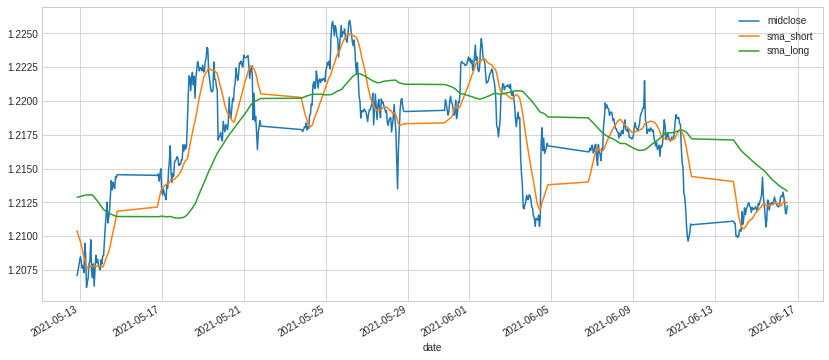

In [5]:
data[['midclose', 'sma_short', 'sma_long']].iloc[-600:].plot()
plt.show()

In [6]:
backtester = IterativeBacktester(data=data, signals=data['signal'], freq='H1', init_money=10000)
backtester.backtest()

100%|██████████| 9900/9900 [00:01<00:00, 5127.63it/s]


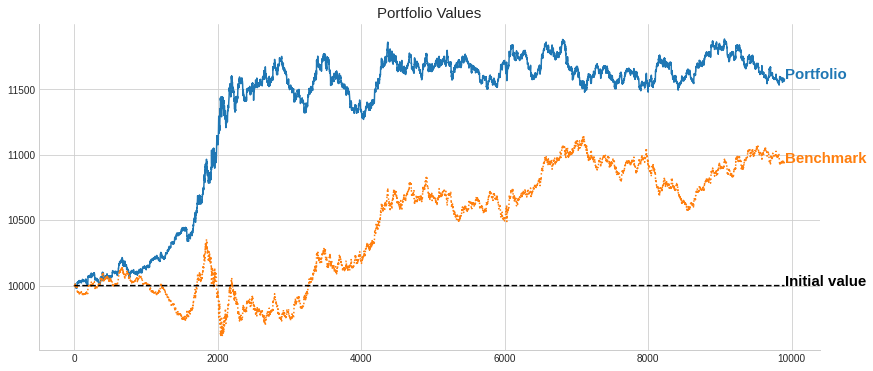

In [7]:
backtester.plot_portfolio()

Portfolio Returns
Data Length: 573 days 12:00:00
***** Benchmark *****
Total Return: 9.39 %
Annualized Return: 5.59 %
Monthly Return: 0.46 %
----------------------------------------
***** Portfolio *****
Total Return: 15.80 %
Annualized Return: 9.29 %
Monthly Return: 0.75 %
----------------------------------------
***** Alpha *****
Total Return: 6.40 %
Annualized Return: 3.70 %
Monthly Return: 0.29 %
----------------------------------------


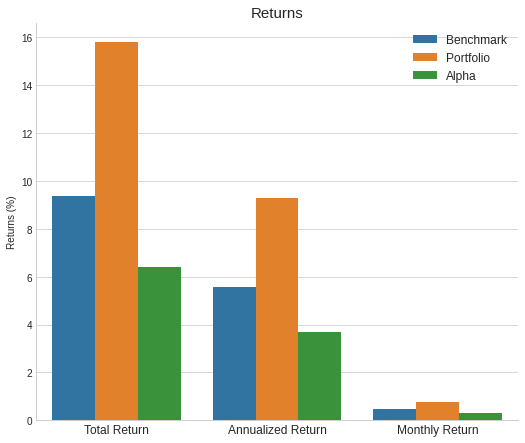

In [8]:
backtester.show_returns()

Portfolio(rebased to 1) Standard Deviation
Data Length: 573 days 12:00:00
***** Benchmark *****
Total Stdev: 4.35 %
Annualized Stdev: 3.39 %
Monthly Stdev: 0.98 %
----------------------------------------
***** Portfolio *****
Total Stdev: 5.66 %
Annualized Stdev: 4.41 %
Monthly Stdev: 1.28 %
----------------------------------------


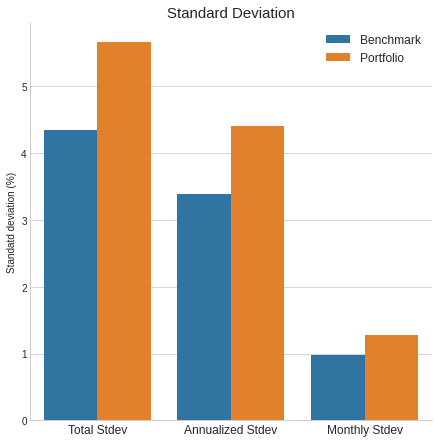

In [9]:
backtester.show_stdevs()

In [10]:
backtester.print_sharpe_ratio()

Annual Sharpe Ratio
Data Length: 573 days 12:00:00
Benchmark: 1.65
Portfolio: 2.11
----------------------------------------


Maximum Drawdown
Benchmark: -7.12 %
Portfolio: -4.27 %
----------------------------------------


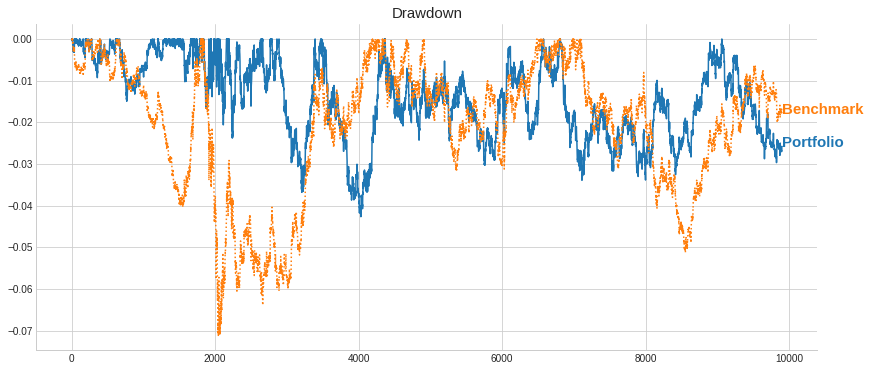

In [11]:
backtester.show_drawdown()